# CHAPTER 3: Common Families of Distributions

### Discrete uniform distribution

Code examples from this great blog - http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

In [1]:
%matplotlib inline

#### Discrete uniform distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats

In [3]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

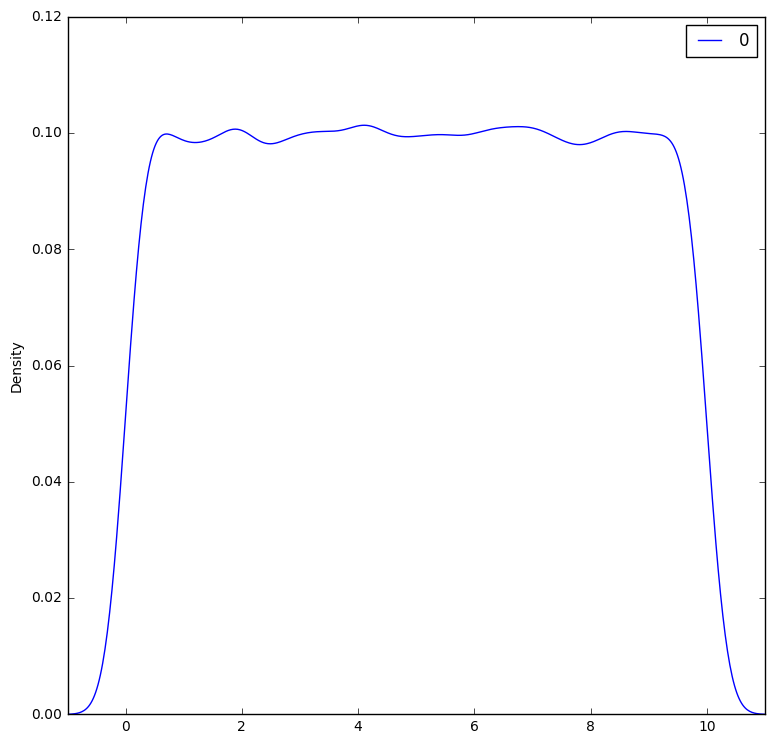

In [4]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

In [5]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

### Normal (Gaussian) Distribution

as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations. - http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

In [6]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

(0.15865525393145707, 0.15865525393145707, 0.68268949213708585)


In [7]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)bb

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

SyntaxError: invalid syntax (<ipython-input-7-733fa0ff6863>, line 18)

In [8]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.95996398454
1.95996398454


### Binomial distribution

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  10  90  449  1210  2044  2507  2050  1115  424  91  10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df78550>]], dtype=object)

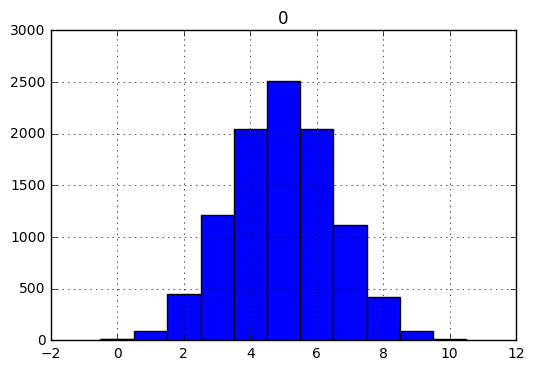

In [9]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   7  51  262  889  1970  3038  2652  1131


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1116cea10>]], dtype=object)

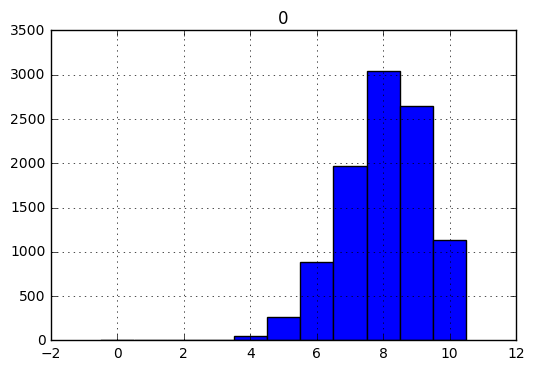

In [10]:
# Not all binomials are symmetric

biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [11]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

### Geometric and Exponential Distributions

The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

col_0     1     2     3    4    5    6   7   8   9   10  11  12
row_0                                                          
counts  4956  2543  1235  653  321  157  47  44  23  10   6   5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111574b10>]], dtype=object)

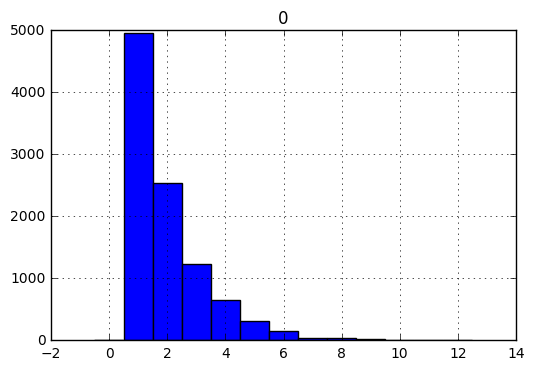

In [12]:
import random

random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts

print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

In [13]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [14]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [15]:
# Exponential (continuous)
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

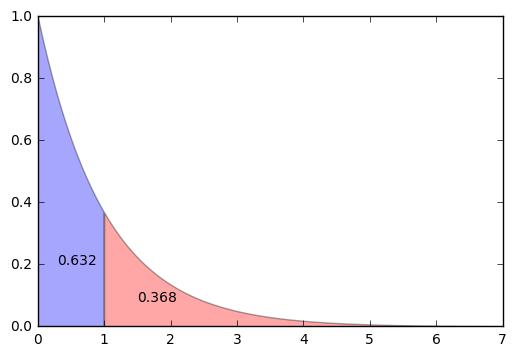

In [16]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

### Exercises

#### Describe the sample space:


### Poisson distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3701  3669  1863  580  151  30  5  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1111f0810>]], dtype=object)

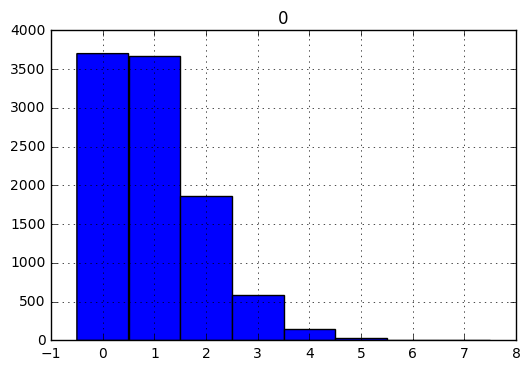

In [17]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)

col_0   0   1   2   3    4    5    6    7     8     9  ...   15   16   17  18  \
row_0                                                  ...                      
counts   1   5  17  81  215  370  631  902  1105  1210 ...  376  214  131  59   

col_0   19  20  21  22  23  24  
row_0                           
counts  34  20  12   1   3   3  

[1 rows x 25 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11196f990>]], dtype=object)

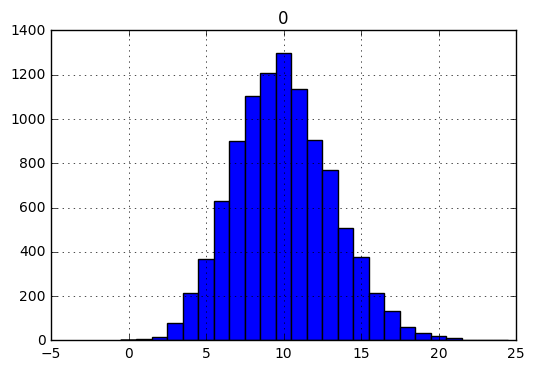

In [18]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)

In [19]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.067085962879031888

In [20]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

### Gamma distribution

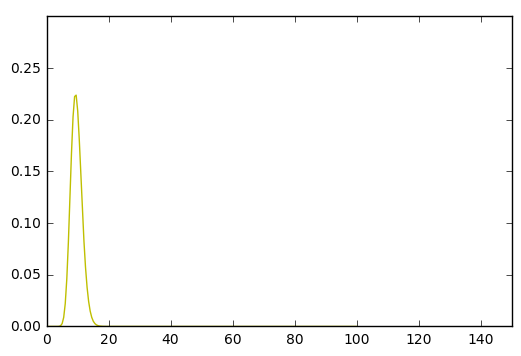

In [29]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=29, scale=0.33333)
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 


plt.ylim([0,0.3])
plt.xlim([0,150])
plt.show()